## **This is Testing Project**
Reference: 
- https://www.kaggle.com/datasets/7a547f8a4ca63fa7ff1c04ad62ee9a3490a4a44f7e4544c8a225f5ef0a1a4338/versions/1?resource=download
- http://dangminhthang.com/computer-vision/characters-segmentation-and-recognition-for-vehicle-license-plate/
- https://customers.pyimagesearch.com/lesson-sample-segmenting-characters-from-license-plates/
- https://stackoverflow.com/questions/23398926/drawing-bounding-box-around-given-size-area-contour
- https://felipemeganha.medium.com/projection-histogram-of-image-using-python-and-opencv-7fd81cadfc23
- https://www.researchgate.net/publication/334239408_An_Efficient_Character_Segmentation_Algorithm_for_Connected_Handwritten_Documents

*This project target is can segmentation any character in a Picture*

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import functools

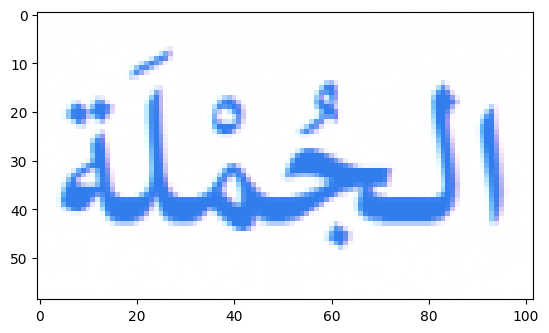

In [36]:
image = cv2.imread('arabic-1.png')
# image = image[660:770, 230:2000]
# image = image[660:770, 230:890]
plt.imshow(image)

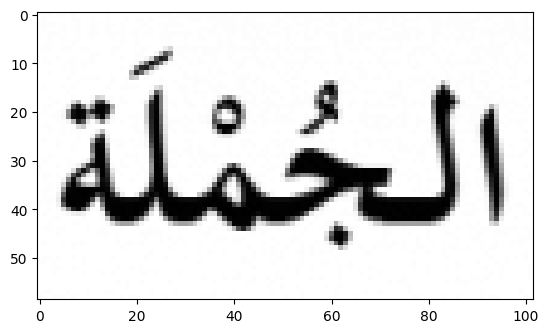

In [37]:
#Image thresholding & invert
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

(59, 102)


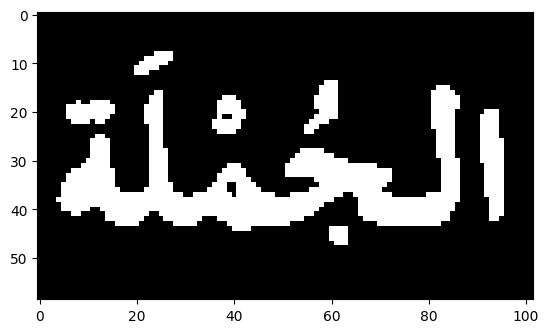

In [38]:
blurred = cv2.GaussianBlur(img, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 45, 15)

print(thresh.shape)
plt.imshow(thresh, cmap='gray')

In [39]:
# Find contours and get bounding box for each contour
cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
boundingBoxes = [cv2.boundingRect(c) for c in cnts]

print(boundingBoxes[0])

(60, 44, 4, 4)


In [40]:
# Sort the bounding boxes from left to right, top to bottom
# sort by Y first, and then sort by X if Ys are similar
def compare(rect1, rect2):
    if abs(rect1[1] - rect2[1]) > 10:
        return rect1[1] - rect2[1]
    else:
        return rect1[0] - rect2[0]
boundingBoxes = sorted(boundingBoxes, key=functools.cmp_to_key(compare) )

print(boundingBoxes[0])

(4, 15, 83, 30)


In [41]:
print(boundingBoxes[5], boundingBoxes[6])

(91, 20, 5, 23) (60, 44, 4, 4)


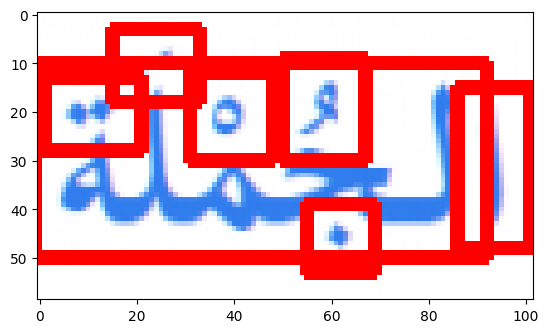

In [42]:
output = image.copy()

for value in boundingBoxes:
    x, y, w, h = value
    output = cv2.rectangle(output, (x - 5,y - 5), (x + w + 5, y + h + 5), (255, 0, 0), 2)

plt.imshow(output, cmap="gray")

In [43]:
# Width and heigth the image
height, width = thresh.shape

In [44]:
# Sum the value lines 
vertical_px = np.sum(thresh, axis=0)

In [45]:
# Normalize
normalize = vertical_px/255

In [46]:
# create a black image with zeros 
blankImage = np.zeros_like(thresh)

In [47]:
# Make the vertical projection histogram
for idx, value in enumerate(normalize):
    cv2.line(blankImage, (idx, 0), (idx, height-int(value)), (255,255,255), 1)

In [48]:
# Concatenate the image
img_concate = cv2.vconcat([output,  cv2.cvtColor(blankImage, cv2.COLOR_BGR2RGB)])

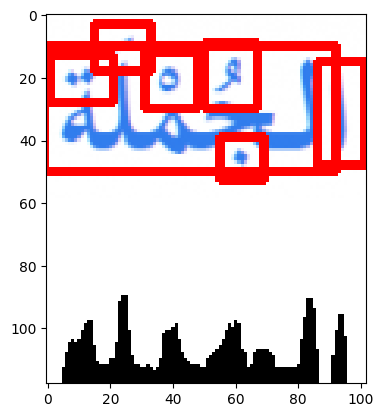

In [49]:
plt.imshow(img_concate)
plt.show()